In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
weights = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
class_num = ["23", "34"]
evaluation_method = ["purity", "nmi", "ari"]


In [8]:
for c_num in class_num:
    for em in evaluation_method:
        uni = list()
        add = list()
        cat = list()
        for file in glob.glob('./csv_' + c_num + '/' + em + '/*'):
            if "add" in file:
                add.append(file)
            elif "cat" in file:
                cat.append(file)
            else:
                uni.append(file)

        uni.sort()
        add.sort()
        cat.sort()

        labels = list()
        labels_x = list()
        labels_a = list()
        km_add = list()
        km_cat = list()
        gmm_add = list()
        gmm_cat = list()
        for csvFile in uni:
            if 'tree' in csvFile:
                labels.append("Tree")
                labels_x.append('Tree')
                labels_a.append('Tree')
            elif 'seq2seq' in csvFile:
                labels.append("seq2seq")
                labels_x.append('seq2seq')
                labels_a.append('seq2seq')
            elif 're' in csvFile:
                labels.append("Real")
                labels_x.append('Real')
                labels_a.append('Real')
            elif 'se' in csvFile:
                labels.append("Semantic")
                labels_x.append('Semantic')
                labels_a.append('Semantic')
            elif 'rico' in csvFile:
                labels.append("Rico")
                labels_x.append('Rico')
                labels_a.append('Rico')
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                km_cat.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))
                gmm_cat.append(float(res.split(',')[0]))


        for csvFile in add:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & seq2seq " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & seq2seq " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'tree' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Tree " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Tree " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Semantic " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("seq2seq & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("seq2seq & Semantic " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            elif 'tree' in csvFile:
                if 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Tree & Semantic " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Tree & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Tree & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Tree & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        labels_a.append("Real & Semantic " + w)
                        labels_x.append(w)
                        if w == "0.1":
                            labels.append("Real & Semantic " + w)
                            is_w = True
                            break
                        else:
                            labels.append(w)
                            is_w = True
                            break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))

        for csvFile in cat:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'tree' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            elif 'tree' in csvFile:
                if 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        is_w = True
                        break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_cat.append(float(res.split(',')[-1]))
                gmm_cat.append(float(res.split(',')[0]))
                
        #make_df(km_add, km_cat, gmm_add, gmm_cat, c_num, em)
        #plot(labels, km_add, km_cat, gmm_add, gmm_cat, em)
        df = pd.DataFrame(data=list(zip(km_add, km_cat, gmm_add, gmm_cat)), columns=['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)'])
        if c_num == '23':
            if em == 'ari':
                df_ari_23 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_23 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_23 = df.copy(deep=True)
        elif c_num == '34':
            if em == 'ari':
                df_ari_34 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_34 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_34 = df.copy(deep=True)

In [12]:
print(df_nmi_23)

    K-Means (Add)  K-Means (Cat)  GMM (Add)  GMM (Cat)
0           0.468          0.468      0.462      0.462
1           0.595          0.595      0.589      0.589
2           0.535          0.535      0.543      0.543
3           0.544          0.544      0.537      0.537
4           0.636          0.636      0.633      0.633
..            ...            ...        ...        ...
81          0.595          0.600      0.599      0.595
82          0.597          0.601      0.589      0.599
83          0.592          0.605      0.596      0.596
84          0.595          0.602      0.588      0.591
85          0.602          0.605      0.598      0.604

[86 rows x 4 columns]


In [13]:
for k, i in enumerate(zip(df_ari_23.idxmax(), df_ari_23.max())):
    print(k, i[0], i[1])

0 45 0.44
1 45 0.437
2 46 0.435
3 45 0.449


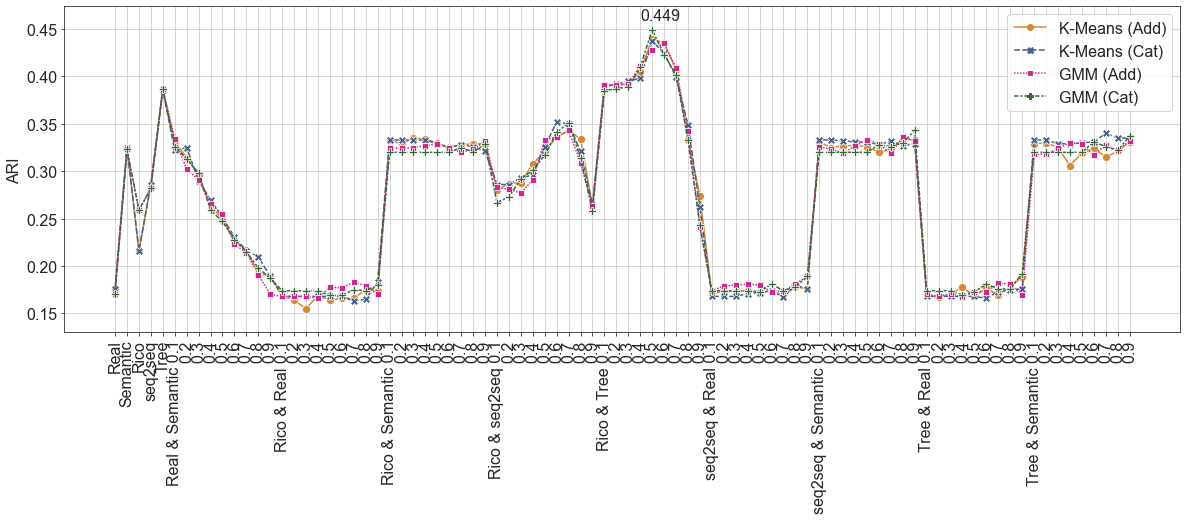

In [16]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.ylim([df_ari_23.min().min()-0.025, df_ari_23.max().max()+0.025])
#plt.text(4, 0.104, 'Real & Semantic')
#plt.text(13, 0.104, 'Rico & Real')
#plt.text(22, 0.104, 'Rico & Semantic')
#plt.text(31, 0.104, 'Rico & seq2seq')
#plt.text(40, 0.104, 'seq2seq & Real')
#plt.text(49, 0.104, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_ari_23.idxmax(), df_ari_23.max())):
    if i==3:
        plt.text(j[0]-1, j[1]+0.01, str(j[1]))
#plt.savefig('../result/plot_ari_23.png', format='png', bbox_inches='tight', transparent=True)

In [17]:
for k, i in enumerate(zip(df_nmi_23.idxmax(), df_nmi_23.max())):
    print(k, i[0], i[1])

0 45 0.653
1 45 0.651
2 45 0.643
3 45 0.654


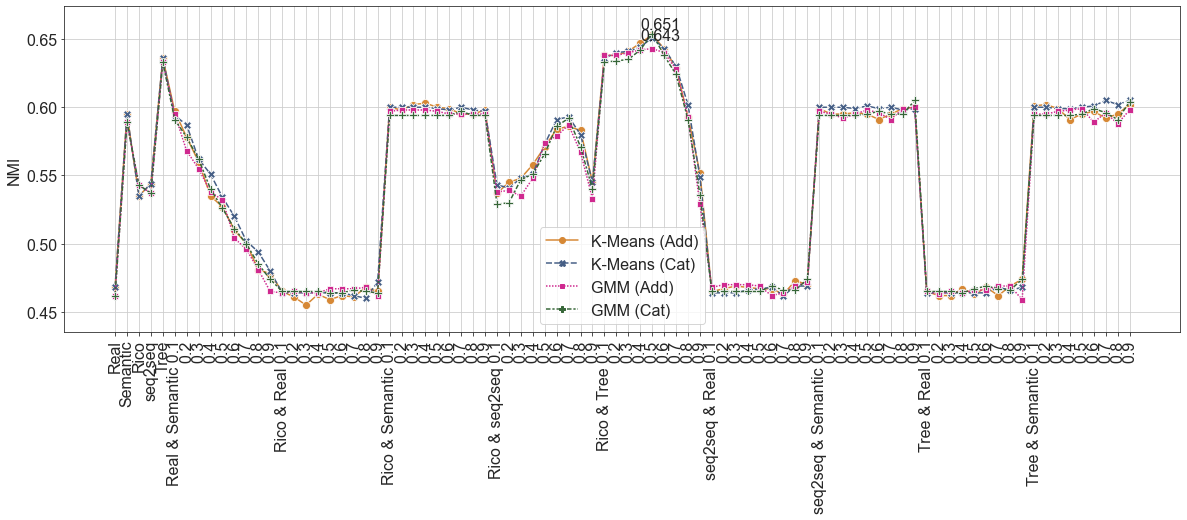

In [18]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.ylim([df_nmi_23.min().min()-0.02, df_nmi_23.max().max()+0.02])
#plt.text(4, 0.411, 'Real & Semantic')
#plt.text(13, 0.411, 'Rico & Real')
#plt.text(22, 0.411, 'Rico & Semantic')
#plt.text(31, 0.411, 'Rico & seq2seq')
#plt.text(40, 0.411, 'seq2seq & Real')
#plt.text(49, 0.411, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_nmi_23.idxmax(), df_nmi_23.max())):
    if i==1 or i==2:
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_nmi_23.png', format='png', bbox_inches='tight', transparent=True)

In [19]:
for k, i in enumerate(zip(df_purity_23.idxmax(), df_purity_23.max())):
    print(k, i[0], i[1])

0 47 0.471
1 45 0.465
2 46 0.506
3 45 0.497


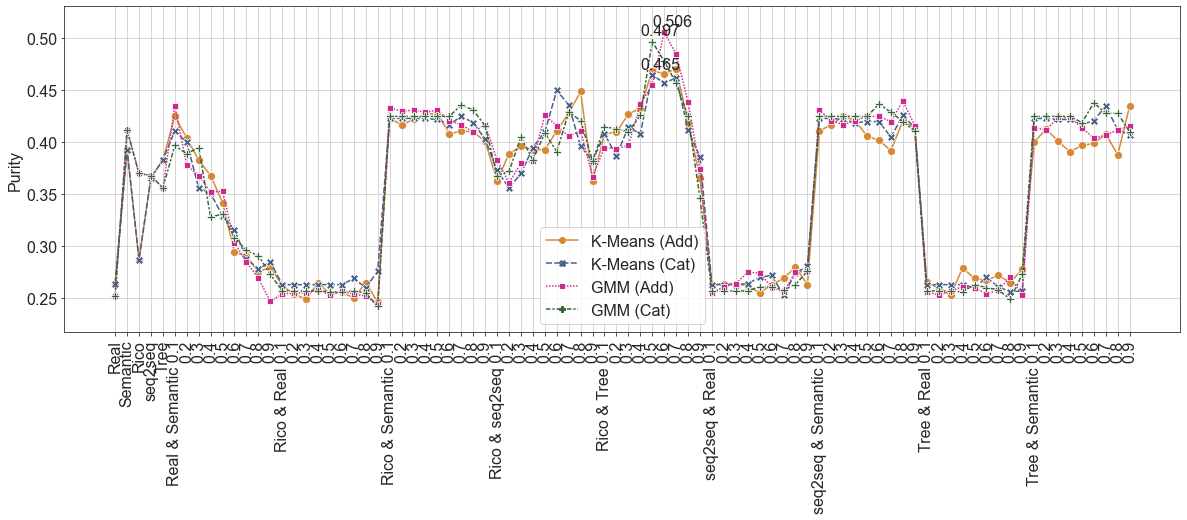

In [20]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.ylim([df_purity_23.min().min()-0.025, df_purity_23.max().max()+0.025])
#plt.text(4, 0.166, 'Real & Semantic')
#plt.text(13, 0.166, 'Rico & Real')
#plt.text(22, 0.166, 'Rico & Semantic')
#plt.text(31, 0.166, 'Rico & seq2seq')
#plt.text(40, 0.166, 'seq2seq & Real')
#plt.text(49, 0.166, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_purity_23.idxmax(), df_purity_23.max())):
    if i != 0: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_purity_23.png', format='png', bbox_inches='tight', transparent=True)

In [12]:
for k, i in enumerate(zip(df_ari_34.idxmax(), df_ari_34.max())):
    print(k, i[0], i[1])

0 37 0.376
1 37 0.396
2 37 0.373
3 37 0.374


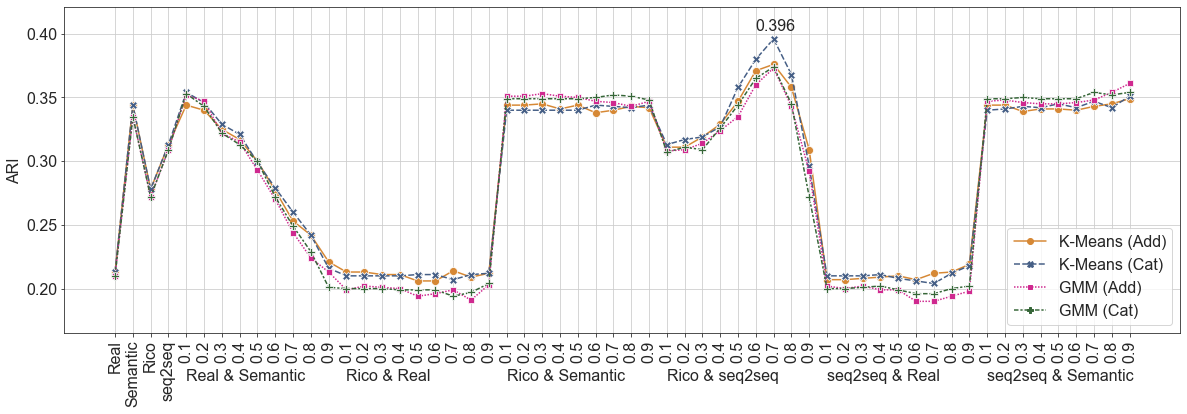

In [88]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="lower right")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_ari_34.min().min()-0.025, df_ari_34.max().max()+0.025])
plt.text(4, 0.128, 'Real & Semantic')
plt.text(13, 0.128, 'Rico & Real')
plt.text(22, 0.128, 'Rico & Semantic')
plt.text(31, 0.128, 'Rico & seq2seq')
plt.text(40, 0.128, 'seq2seq & Real')
plt.text(49, 0.128, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_ari_34.idxmax(), df_ari_34.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_ari_34.png', format='png', bbox_inches='tight', transparent=True)

In [14]:
for k, i in enumerate(zip(df_nmi_34.idxmax(), df_nmi_34.max())):
    print(k, i[0], i[1])

0 57 0.639
1 4 0.642
2 57 0.642
3 57 0.642


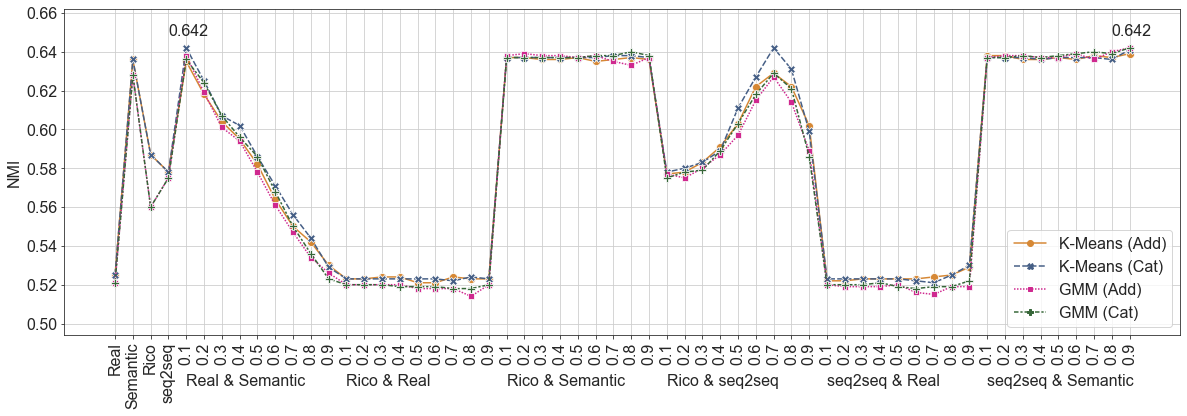

In [91]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_nmi_34.min().min()-0.02, df_nmi_34.max().max()+0.02])
plt.text(4, 0.468, 'Real & Semantic')
plt.text(13, 0.468, 'Rico & Real')
plt.text(22, 0.468, 'Rico & Semantic')
plt.text(31, 0.468, 'Rico & seq2seq')
plt.text(40, 0.468, 'seq2seq & Real')
plt.text(49, 0.468, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_nmi_34.idxmax(), df_nmi_34.max())):
    if i==1 or i==2: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_nmi_34.png', format='png', bbox_inches='tight', transparent=True)

In [16]:
for k, i in enumerate(zip(df_purity_34.idxmax(), df_purity_34.max())):
    print(k, i[0], i[1])

0 37 0.498
1 37 0.513
2 37 0.494
3 37 0.492


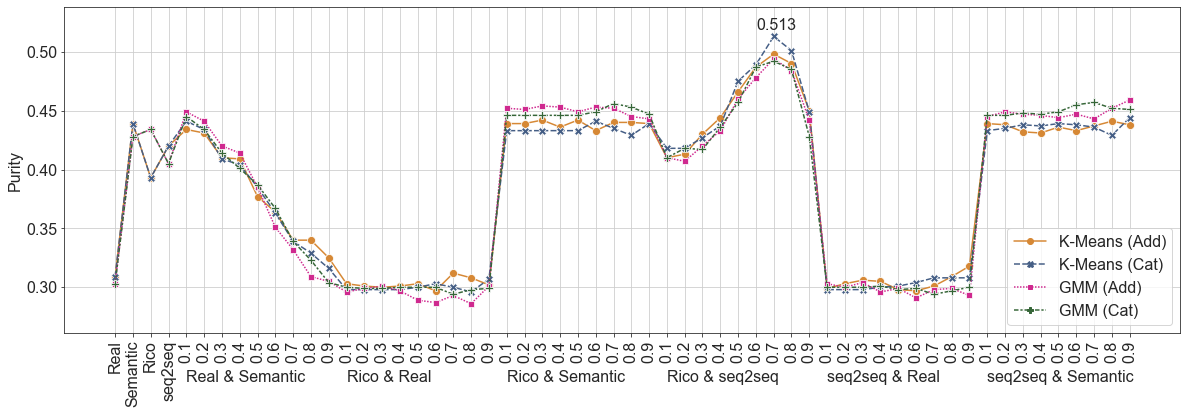

In [95]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_purity_34.min().min()-0.025, df_purity_34.max().max()+0.025])
plt.text(4, 0.22, 'Real & Semantic')
plt.text(13, 0.22, 'Rico & Real')
plt.text(22, 0.22, 'Rico & Semantic')
plt.text(31, 0.22, 'Rico & seq2seq')
plt.text(40, 0.22, 'seq2seq & Real')
plt.text(49, 0.22, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_purity_34.idxmax(), df_purity_34.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_purity_34.png', format='png', bbox_inches='tight', transparent=True)

In [96]:
labels_23 = ['C23 K-Means (Add)', 'C23 K-Means (Car)', 'C23 GMM (Add)', 'C23 GMM (Cat)']
labels_34 = ['R34 K-Means (Add)', 'R34 K-Means (Car)', 'R34 GMM (Add)', 'R34 GMM (Cat)']

df_ari_23_t = df_ari_23.copy(deep=True)
df_ari_23_t.columns = labels_23
df_ari_34_t = df_ari_34.copy(deep=True)
df_ari_34_t.columns = labels_34

df_nmi_23_t = df_nmi_23.copy(deep=True)
df_nmi_23_t.columns = labels_23
df_nmi_34_t = df_nmi_34.copy(deep=True)
df_nmi_34_t.columns = labels_34

df_purity_23_t = df_purity_23.copy(deep=True)
df_purity_23_t.columns = labels_23
df_purity_34_t = df_purity_34.copy(deep=True)
df_purity_34_t.columns = labels_34

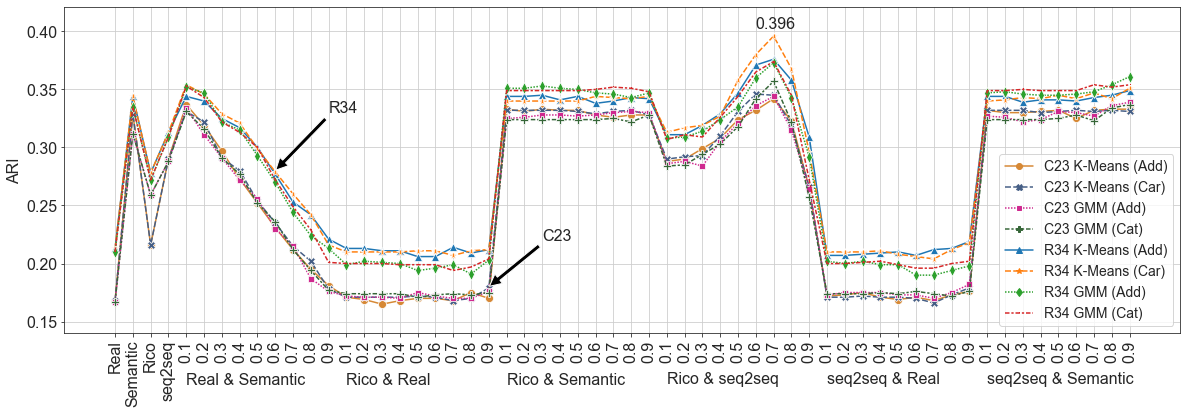

In [104]:
plt.figure(figsize=(20,6))

colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_t, palette=colors, markers=True, markersize=8)
sns.lineplot(data=df_ari_34_t, markers=['^', '*', 'd', ','], markersize=8)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.annotate('R34', xy=(9, 0.28), xytext=(12, 0.33), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('C23', xy=(21, 0.18), xytext=(24, 0.22), arrowprops=dict(facecolor='black', shrink=0.01))
plt.text(4, 0.096, 'Real & Semantic')
plt.text(13, 0.096, 'Rico & Real')
plt.text(22, 0.096, 'Rico & Semantic')
plt.text(31, 0.096, 'Rico & seq2seq')
plt.text(40, 0.096, 'seq2seq & Real')
plt.text(49, 0.096, 'seq2seq & Semantic')
plt.ylim([df_ari_23_t.min().min()-0.025, df_ari_34_t.max().max()+0.025])
for i, j in enumerate(zip(df_ari_34_t.idxmax(), df_ari_34_t.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_ari.png', format='png', bbox_inches='tight', transparent=True)

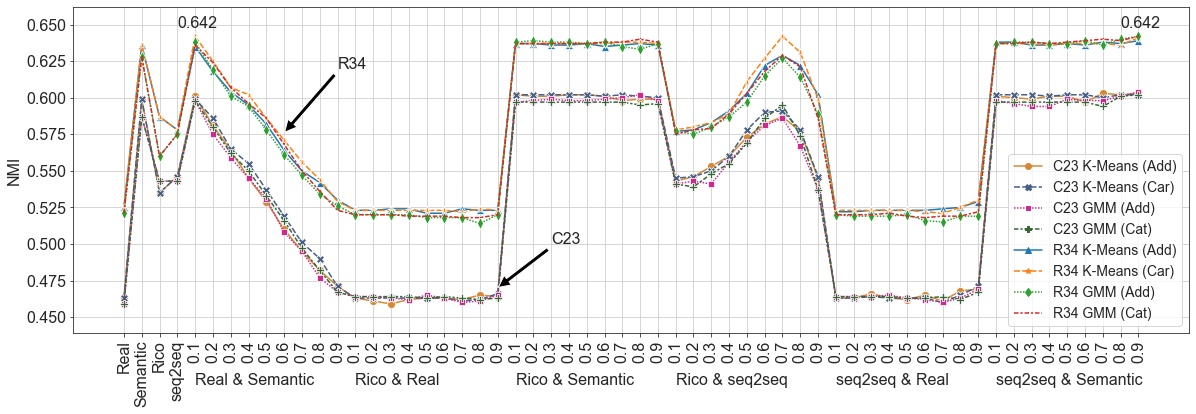

In [105]:
plt.figure(figsize=(20,6))

colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_t, palette=colors, markers=True, markersize=8)
sns.lineplot(data=df_nmi_34_t, markers=['^', '*', 'd', ','], markersize=8)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.annotate('R34', xy=(9, 0.576), xytext=(12, 0.62), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('C23', xy=(21, 0.47), xytext=(24, 0.5), arrowprops=dict(facecolor='black', shrink=0.01))
plt.text(4, 0.404, 'Real & Semantic')
plt.text(13, 0.404, 'Rico & Real')
plt.text(22, 0.404, 'Rico & Semantic')
plt.text(31, 0.404, 'Rico & seq2seq')
plt.text(40, 0.404, 'seq2seq & Real')
plt.text(49, 0.404, 'seq2seq & Semantic')
plt.ylim([df_nmi_23_t.min().min()-0.02, df_nmi_34_t.max().max()+0.02])
for i, j in enumerate(zip(df_nmi_34_t.idxmax(), df_nmi_34_t.max())):
    if i==1 or i==2: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_nmi.png', format='png', bbox_inches='tight', transparent=True)


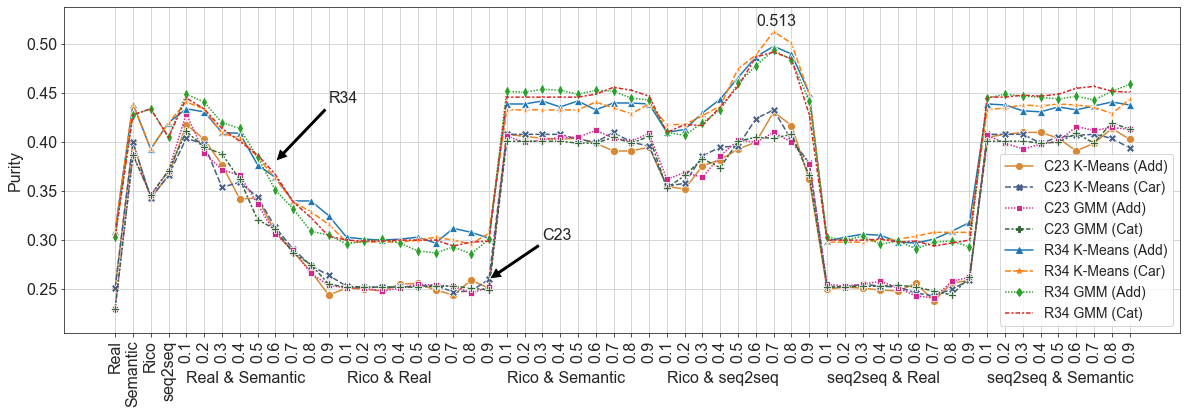

In [110]:
plt.figure(figsize=(20,6))

colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_t, palette=colors, markers=True, markersize=8)
sns.lineplot(data=df_purity_34_t, markers=['^', '*', 'd', ','], markersize=8)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.annotate('R34', xy=(9, 0.38), xytext=(12, 0.44), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('C23', xy=(21, 0.26), xytext=(24, 0.3), arrowprops=dict(facecolor='black', shrink=0.01))
plt.text(4, 0.154, 'Real & Semantic')
plt.text(13, 0.154, 'Rico & Real')
plt.text(22, 0.154, 'Rico & Semantic')
plt.text(31, 0.154, 'Rico & seq2seq')
plt.text(40, 0.154, 'seq2seq & Real')
plt.text(49, 0.154, 'seq2seq & Semantic')
plt.ylim([df_purity_23_t.min().min()-0.025, df_purity_34_t.max().max()+0.025])
for i, j in enumerate(zip(df_purity_34_t.idxmax(), df_purity_34_t.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_purity.png', format='png', bbox_inches='tight', transparent=True)

In [111]:
df_ari_23[0:4]['GMM (Add)']

0    0.167
1    0.312
2    0.259
3    0.288
Name: GMM (Add), dtype: float64

In [112]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Semantic', 'Rico', 'seq2seq']
df_23 = pd.DataFrame([df_ari_23[0:4]['GMM (Add)'], df_ari_23[0:4]['K-Means (Add)'], df_nmi_23[0:4]['GMM (Add)'], df_nmi_23[0:4]['K-Means (Add)'], df_purity_23[0:4]['GMM (Add)'], df_purity_23[0:4]['K-Means (Add)']])
df_23.columns = column_names
df_23 = df_23.T
df_23.columns = row_names
df_23['type'] = column_names
df_23 = pd.melt(df_23, id_vars="type", var_name="eval", value_name="eval_values")
#df_23.to_csv('../result/df_23_all.csv')

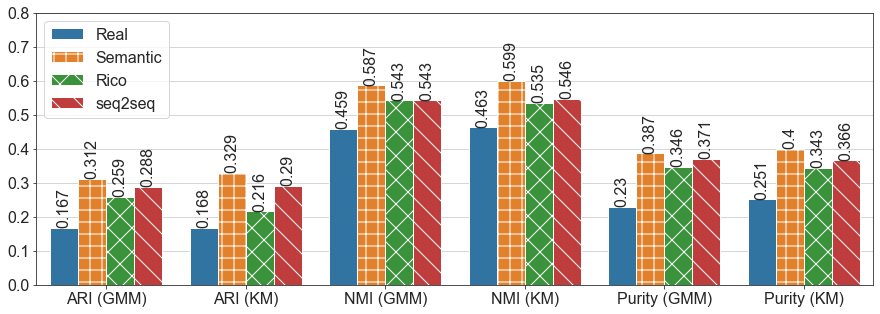

In [113]:
plt.figure(figsize=(15,5))
#plt.xticks(rotation=90)
#ax = sns.barplot(data=df_23_t, color='#3F466E')
ax = sns.barplot(x='eval', y='eval_values', data=df_23, hue='type')
#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container, rotation=90)
hatches = [None, '+', 'x', '\\', '*', 'o']
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper left")
plt.ylim((0, 0.8))
plt.xlabel(None)
plt.ylabel(None)
#plt.savefig('../result/plot_single_23.png', format='png', bbox_inches='tight', transparent=True)

In [114]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Semantic', 'Rico', 'seq2seq']
df_34 = pd.DataFrame([df_ari_34[0:4]['GMM (Add)'], df_ari_34[0:4]['K-Means (Add)'], df_nmi_34[0:4]['GMM (Add)'], df_nmi_34[0:4]['K-Means (Add)'], df_purity_34[0:4]['GMM (Add)'], df_purity_34[0:4]['K-Means (Add)']])
df_34.columns = column_names
df_34 = df_34.T
df_34.columns = row_names
df_34['type'] = column_names
df_34 = pd.melt(df_34, id_vars="type", var_name="eval", value_name="eval_values")
#df_34.to_csv('../result/df_34_all.csv')

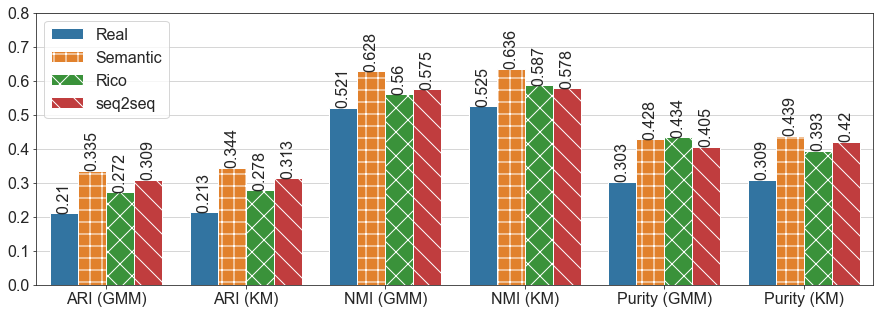

In [115]:
plt.figure(figsize=(15,5))
#plt.xticks(rotation=90)
#ax = sns.barplot(data=df_23_t, color='#3F466E')
ax = sns.barplot(x='eval', y='eval_values', data=df_34, hue='type')

#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container, rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper left")
plt.ylim((0, 0.8))
plt.xlabel(None)
plt.ylabel(None)
#plt.savefig('../result/plot_single_34.png', format='png', bbox_inches='tight', transparent=True)

In [116]:
df_ari_23_x = df_ari_23.copy()
df_ari_23_x['label'] = labels_x
df_ari_23_x.set_index('label', inplace=True)
df_ari_23_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.168,0.168,0.167,0.167
Semantic,0.329,0.329,0.312,0.312
Rico,0.216,0.216,0.259,0.259
seq2seq,0.290,0.290,0.288,0.288
0.1,0.337,0.331,0.334,0.331


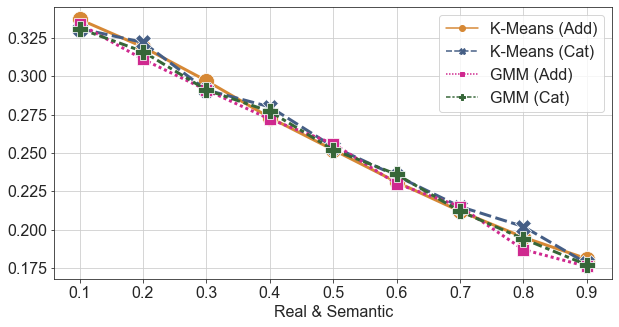

In [117]:
# real & semantic
df_ari_23_x[4:13]
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[4:13], linewidth=3, palette=colors, markers=True, markersize=16)
# label font size
#plt.xlabel('Real & Semantic', fontsize=18)
plt.xlabel('Real & Semantic')
#plt.savefig('../result/plot_ari_re_se_23.png', format='png', bbox_inches='tight', transparent=True)

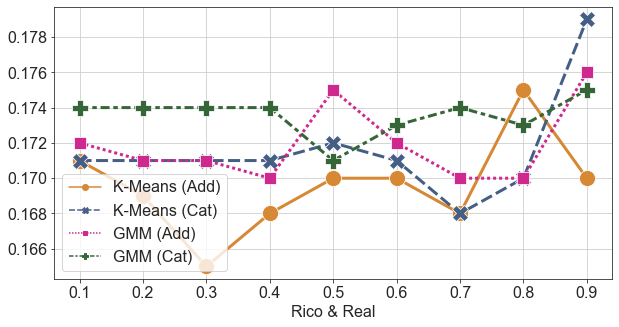

In [118]:
# rico & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[13:22], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Real')
#plt.savefig('../result/plot_ari_rico_re_23.png', format='png', bbox_inches='tight', transparent=True)

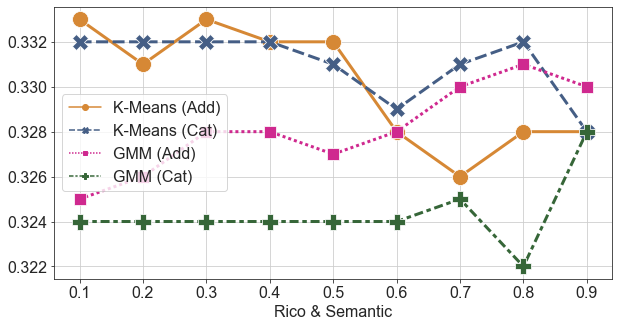

In [119]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[22:31], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Semantic')
#plt.savefig('../result/plot_ari_rico_se_23.png', format='png', bbox_inches='tight', transparent=True)

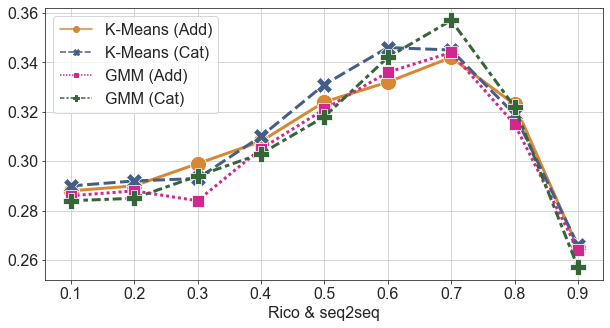

In [120]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[31:40], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & seq2seq')
#plt.savefig('../result/plot_ari_rico_s2s_23.png', format='png', bbox_inches='tight', transparent=True)

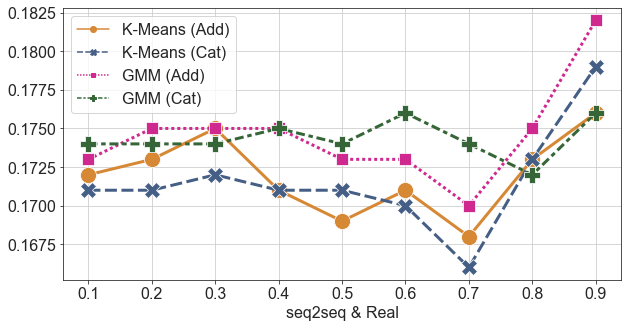

In [121]:
# seq2seq & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[40:49], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('seq2seq & Real')
#plt.savefig('../result/plot_ari_s2s_re_23.png', format='png', bbox_inches='tight', transparent=True)

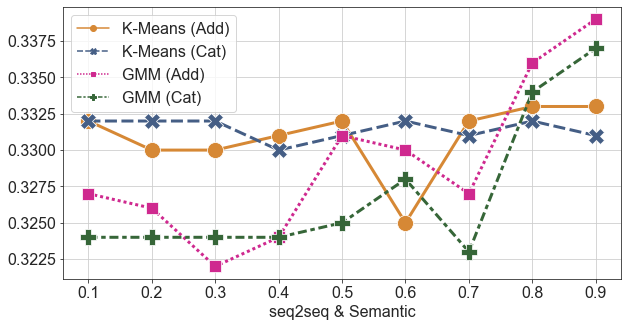

In [122]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[49:58], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('seq2seq & Semantic')
#plt.savefig('../result/plot_ari_s2s_se_23.png', format='png', bbox_inches='tight', transparent=True)

In [123]:
df_nmi_23_x = df_nmi_23.copy()
df_nmi_23_x['label'] = labels_x
df_nmi_23_x.set_index('label', inplace=True)
df_nmi_23_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.463,0.463,0.459,0.459
Semantic,0.599,0.599,0.587,0.587
Rico,0.535,0.535,0.543,0.543
seq2seq,0.546,0.546,0.543,0.543
0.1,0.601,0.599,0.598,0.598


In [9]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[22:31], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Semantic')
#plt.savefig('../result/plot_nmi_rico_se_23.png', format='png', bbox_inches='tight', transparent=True)

NameError: name 'df_nmi_23_x' is not defined

<Figure size 720x360 with 0 Axes>

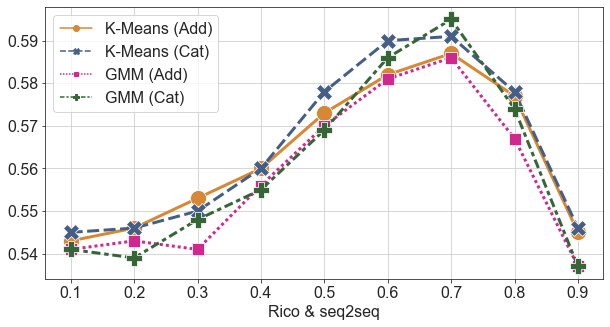

In [125]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[31:40], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & seq2seq')
#plt.savefig('../result/plot_nmi_rico_s2s_23.png', format='png', bbox_inches='tight', transparent=True)

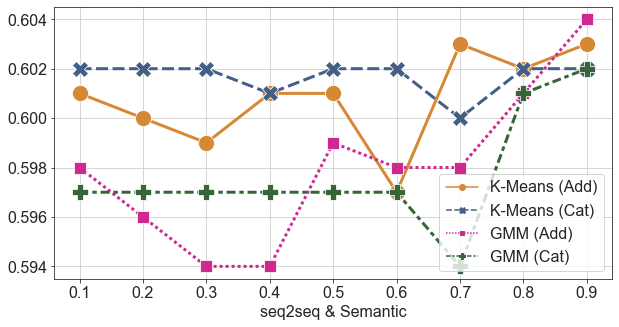

In [126]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[49:58], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('seq2seq & Semantic')
#plt.savefig('../result/plot_nmi_s2s_se_23.png', format='png', bbox_inches='tight', transparent=True)

In [127]:
df_purity_23_x = df_purity_23.copy()
df_purity_23_x['label'] = labels_x
df_purity_23_x.set_index('label', inplace=True)
df_purity_23_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.251,0.251,0.230,0.230
Semantic,0.400,0.400,0.387,0.387
Rico,0.343,0.343,0.346,0.346
seq2seq,0.366,0.366,0.371,0.371
0.1,0.418,0.404,0.429,0.411


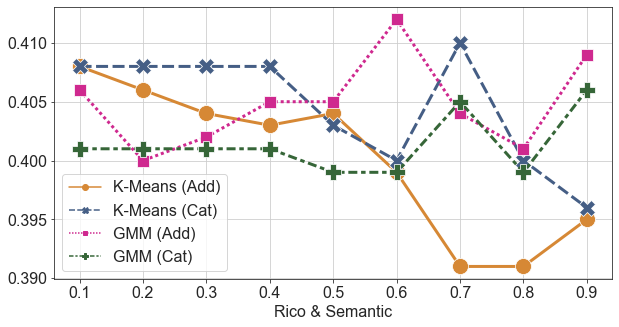

In [128]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_x[22:31], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Semantic')
#plt.savefig('../result/plot_purity_rico_se_23.png', format='png', bbox_inches='tight', transparent=True)

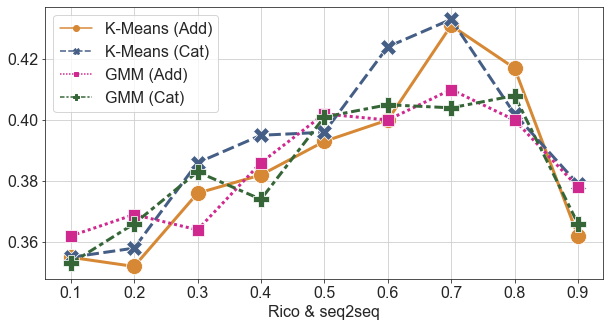

In [129]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_x[31:40], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & seq2seq')
#plt.savefig('../result/plot_purity_rico_s2s_23.png', format='png', bbox_inches='tight', transparent=True)

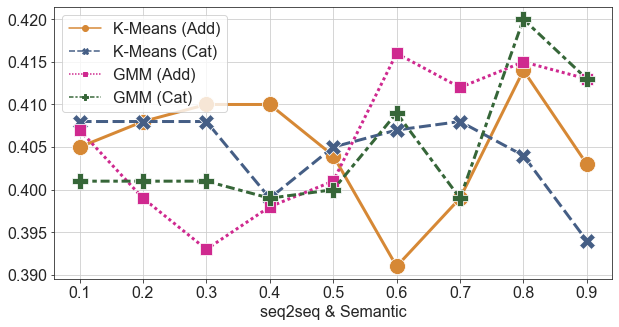

In [130]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_x[49:58], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('seq2seq & Semantic')
#plt.savefig('../result/plot_purity_s2s_se_23.png', format='png', bbox_inches='tight', transparent=True)

In [131]:
df_ari_34_x = df_ari_34.copy()
df_ari_34_x['label'] = labels_x
df_ari_34_x.set_index('label', inplace=True)
df_ari_34_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.213,0.213,0.210,0.210
Semantic,0.344,0.344,0.335,0.335
Rico,0.278,0.278,0.272,0.272
seq2seq,0.313,0.313,0.309,0.309
0.1,0.344,0.354,0.352,0.353


In [132]:
df_nmi_34_x = df_nmi_34.copy()
df_nmi_34_x['label'] = labels_x
df_nmi_34_x.set_index('label', inplace=True)
df_nmi_34_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.525,0.525,0.521,0.521
Semantic,0.636,0.636,0.628,0.628
Rico,0.587,0.587,0.560,0.560
seq2seq,0.578,0.578,0.575,0.575
0.1,0.635,0.642,0.638,0.636


In [133]:
df_purity_34_x = df_purity_34.copy()
df_purity_34_x['label'] = labels_x
df_purity_34_x.set_index('label', inplace=True)
df_purity_34_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.309,0.309,0.303,0.303
Semantic,0.439,0.439,0.428,0.428
Rico,0.393,0.393,0.434,0.434
seq2seq,0.420,0.420,0.405,0.405
0.1,0.434,0.441,0.449,0.445


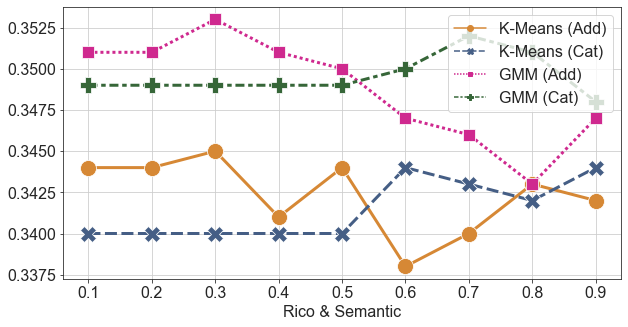

In [134]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34_x[22:31], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Semantic')
#plt.savefig('../result/plot_ari_rico_se_34.png', format='png', bbox_inches='tight', transparent=True)

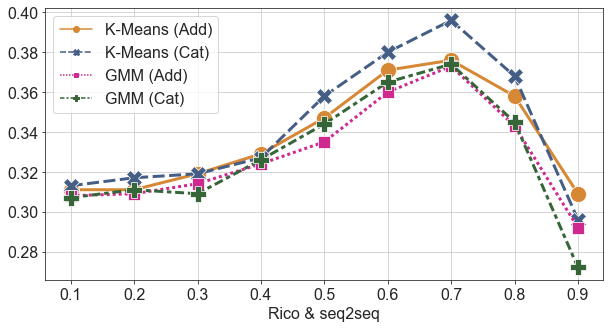

In [135]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34_x[31:40], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & seq2seq')
#plt.savefig('../result/plot_ari_rico_s2s_34.png', format='png', bbox_inches='tight', transparent=True)

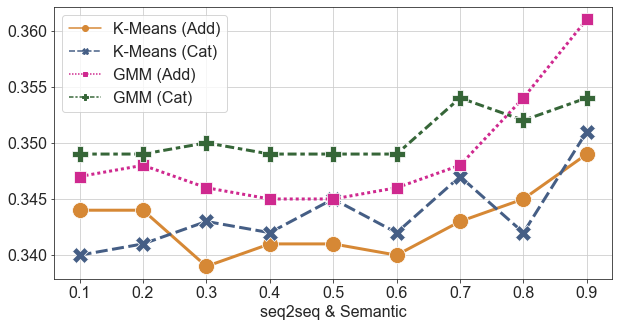

In [136]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34_x[49:58], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('seq2seq & Semantic')
#plt.savefig('../result/plot_ari_s2s_se_34.png', format='png', bbox_inches='tight', transparent=True)

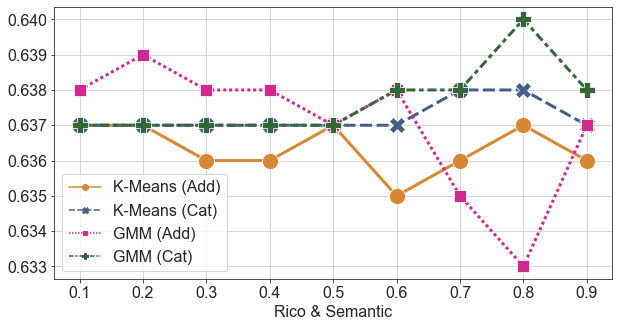

In [137]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34_x[22:31], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Semantic')
#plt.savefig('../result/plot_nmi_rico_se_34.png', format='png', bbox_inches='tight', transparent=True)

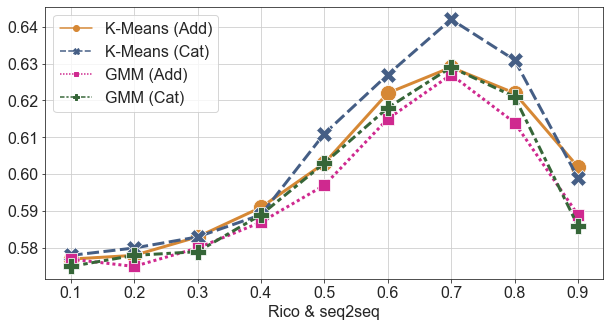

In [138]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34_x[31:40], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & seq2seq')
#plt.savefig('../result/plot_nmi_rico_s2s_34.png', format='png', bbox_inches='tight', transparent=True)

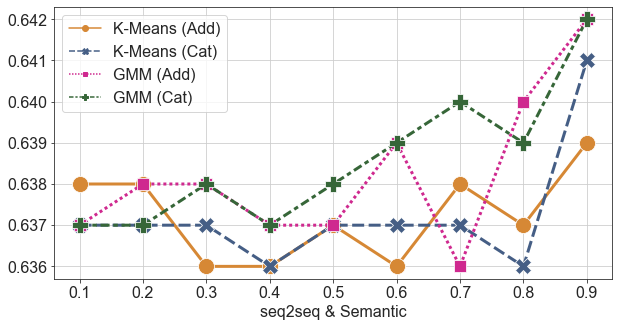

In [139]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34_x[49:58], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('seq2seq & Semantic')
#plt.savefig('../result/plot_nmi_s2s_se_34.png', format='png', bbox_inches='tight', transparent=True)

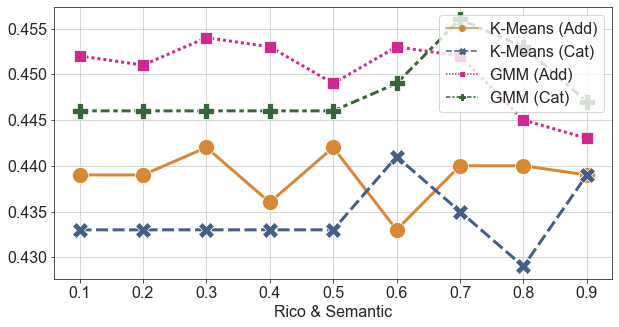

In [140]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34_x[22:31], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Semantic')
#plt.savefig('../result/plot_purity_rico_se_34.png', format='png', bbox_inches='tight', transparent=True)

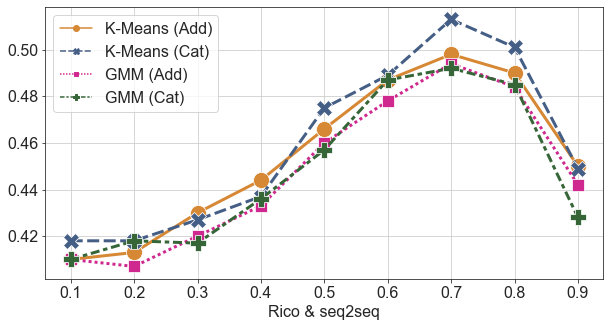

In [141]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34_x[31:40], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & seq2seq')
#plt.savefig('../result/plot_purity_rico_s2s_34.png', format='png', bbox_inches='tight', transparent=True)

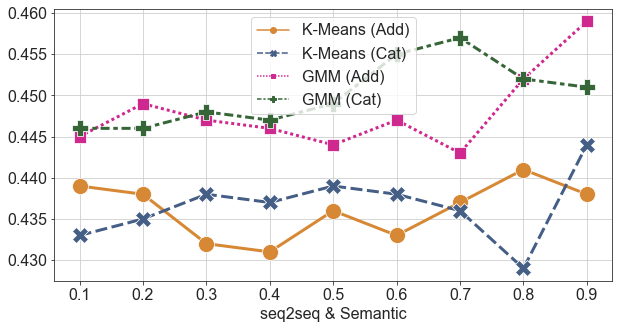

In [142]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34_x[49:58], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('seq2seq & Semantic')
#plt.savefig('../result/plot_purity_s2s_se_34.png', format='png', bbox_inches='tight', transparent=True)

In [143]:
df_ari_23_a = df_ari_23.copy()
df_ari_23_a['label'] = labels_a
df_ari_23_a.set_index('label', inplace=True)
#df_ari_23_a.head(5)
print(df_ari_23_a['K-Means (Add)'].nlargest(n=5), df_ari_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_ari_23_a['GMM (Add)'].nlargest(n=5), df_ari_23_a['GMM (Cat)'].nlargest(n=5))

label
Rico & seq2seq 0.7        0.342
Real & Semantic 0.1       0.337
Rico & Semantic 0.1       0.333
Rico & Semantic 0.3       0.333
seq2seq & Semantic 0.8    0.333
Name: K-Means (Add), dtype: float64 label
Rico & seq2seq 0.6     0.346
Rico & seq2seq 0.7     0.345
Rico & Semantic 0.1    0.332
Rico & Semantic 0.2    0.332
Rico & Semantic 0.3    0.332
Name: K-Means (Cat), dtype: float64
label
Rico & seq2seq 0.7        0.344
seq2seq & Semantic 0.9    0.339
Rico & seq2seq 0.6        0.336
seq2seq & Semantic 0.8    0.336
Real & Semantic 0.1       0.334
Name: GMM (Add), dtype: float64 label
Rico & seq2seq 0.7        0.357
Rico & seq2seq 0.6        0.342
seq2seq & Semantic 0.9    0.337
seq2seq & Semantic 0.8    0.334
Real & Semantic 0.1       0.331
Name: GMM (Cat), dtype: float64


In [144]:
df_ari_34_a = df_ari_34.copy()
df_ari_34_a['label'] = labels_a
df_ari_34_a.set_index('label', inplace=True)
print(df_ari_34_a['K-Means (Add)'].nlargest(n=5), df_ari_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_ari_34_a['GMM (Add)'].nlargest(n=5), df_ari_34_a['GMM (Cat)'].nlargest(n=5))

label
Rico & seq2seq 0.7        0.376
Rico & seq2seq 0.6        0.371
Rico & seq2seq 0.8        0.358
seq2seq & Semantic 0.9    0.349
Rico & seq2seq 0.5        0.347
Name: K-Means (Add), dtype: float64 label
Rico & seq2seq 0.7     0.396
Rico & seq2seq 0.6     0.380
Rico & seq2seq 0.8     0.368
Rico & seq2seq 0.5     0.358
Real & Semantic 0.1    0.354
Name: K-Means (Cat), dtype: float64
label
Rico & seq2seq 0.7        0.373
seq2seq & Semantic 0.9    0.361
Rico & seq2seq 0.6        0.360
seq2seq & Semantic 0.8    0.354
Rico & Semantic 0.3       0.353
Name: GMM (Add), dtype: float64 label
Rico & seq2seq 0.7        0.374
Rico & seq2seq 0.6        0.365
seq2seq & Semantic 0.7    0.354
seq2seq & Semantic 0.9    0.354
Real & Semantic 0.1       0.353
Name: GMM (Cat), dtype: float64


In [154]:
df_nmi_23_a = df_nmi_23.copy()
df_nmi_23_a['label'] = labels_a
df_nmi_23_a.set_index('label', inplace=True)
print(df_nmi_23_a['K-Means (Add)'].nlargest(n=5), df_nmi_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_nmi_23_a['GMM (Add)'].nlargest(n=5), df_nmi_23_a['GMM (Cat)'].nlargest(n=5))
print('--')
df_nmi_34_a = df_nmi_34.copy()
df_nmi_34_a['label'] = labels_a
df_nmi_34_a.set_index('label', inplace=True)
print(df_nmi_34_a['K-Means (Add)'].nlargest(n=5), df_nmi_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_nmi_34_a['GMM (Add)'].nlargest(n=5), df_nmi_34_a['GMM (Cat)'].nlargest(n=5))

label
seq2seq & Semantic 0.7    0.603
seq2seq & Semantic 0.9    0.603
Rico & Semantic 0.1       0.602
Rico & Semantic 0.4       0.602
Rico & Semantic 0.5       0.602
Name: K-Means (Add), dtype: float64 label
Rico & Semantic 0.1    0.602
Rico & Semantic 0.2    0.602
Rico & Semantic 0.3    0.602
Rico & Semantic 0.4    0.602
Rico & Semantic 0.5    0.602
Name: K-Means (Cat), dtype: float64
label
seq2seq & Semantic 0.9    0.604
Rico & Semantic 0.8       0.602
seq2seq & Semantic 0.8    0.601
Rico & Semantic 0.7       0.600
Rico & Semantic 0.3       0.599
Name: GMM (Add), dtype: float64 label
seq2seq & Semantic 0.9    0.602
seq2seq & Semantic 0.8    0.601
Real & Semantic 0.1       0.598
Rico & Semantic 0.1       0.597
Rico & Semantic 0.2       0.597
Name: GMM (Cat), dtype: float64
--
label
seq2seq & Semantic 0.9    0.639
seq2seq & Semantic 0.1    0.638
seq2seq & Semantic 0.2    0.638
seq2seq & Semantic 0.7    0.638
Rico & Semantic 0.1       0.637
Name: K-Means (Add), dtype: float64 label
Real

In [146]:
df_purity_23_a = df_purity_23.copy()
df_purity_23_a['label'] = labels_a
df_purity_23_a.set_index('label', inplace=True)
print(df_purity_23_a['K-Means (Add)'].nlargest(n=5), df_purity_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_purity_23_a['GMM (Add)'].nlargest(n=5), df_purity_23_a['GMM (Cat)'].nlargest(n=5))
print('--')
df_purity_34_a = df_purity_34.copy()
df_purity_34_a['label'] = labels_a
df_purity_34_a.set_index('label', inplace=True)
print(df_purity_34_a['K-Means (Add)'].nlargest(n=5), df_purity_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_purity_34_a['GMM (Add)'].nlargest(n=5), df_purity_34_a['GMM (Cat)'].nlargest(n=5))

label
Rico & seq2seq 0.7        0.431
Real & Semantic 0.1       0.418
Rico & seq2seq 0.8        0.417
seq2seq & Semantic 0.8    0.414
seq2seq & Semantic 0.3    0.410
Name: K-Means (Add), dtype: float64 label
Rico & seq2seq 0.7     0.433
Rico & seq2seq 0.6     0.424
Rico & Semantic 0.7    0.410
Rico & Semantic 0.1    0.408
Rico & Semantic 0.2    0.408
Name: K-Means (Cat), dtype: float64
label
Real & Semantic 0.1       0.429
seq2seq & Semantic 0.6    0.416
seq2seq & Semantic 0.8    0.415
seq2seq & Semantic 0.9    0.413
Rico & Semantic 0.6       0.412
Name: GMM (Add), dtype: float64 label
seq2seq & Semantic 0.8    0.420
seq2seq & Semantic 0.9    0.413
Real & Semantic 0.1       0.411
seq2seq & Semantic 0.6    0.409
Rico & seq2seq 0.8        0.408
Name: GMM (Cat), dtype: float64
--
label
Rico & seq2seq 0.7    0.498
Rico & seq2seq 0.8    0.490
Rico & seq2seq 0.6    0.487
Rico & seq2seq 0.5    0.466
Rico & seq2seq 0.9    0.450
Name: K-Means (Add), dtype: float64 label
Rico & seq2seq 0.7    0.

In [147]:
mean_name = ['Real & Semantic', 'Rico & Real', 'Rico & Semantic', 'Rico & seq2seq', 'seq2seq & Real', 'seq2seq & Semantic']
type_name = ['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)']
df_ari_23_mean = pd.DataFrame([df_ari_23_a[4:13].mean(), df_ari_23_a[13:22].mean(),  df_ari_23_a[22:31].mean(), df_ari_23_a[31:40].mean(), df_ari_23_a[40:49].mean(), df_ari_23_a[49:58].mean()])
df_ari_23_mean = df_ari_23_mean.T
df_ari_23_mean.columns = mean_name
df_ari_23_mean['type'] = type_name
df_ari_23_mm = pd.DataFrame([df_ari_23_mean.mean()])
df_ari_23_mm = df_ari_23_mm.T
df_ari_23_mean = pd.melt(df_ari_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_23_mean = pd.DataFrame([df_nmi_23_a[4:13].mean(), df_nmi_23_a[13:22].mean(),  df_nmi_23_a[22:31].mean(), df_nmi_23_a[31:40].mean(), df_nmi_23_a[40:49].mean(), df_nmi_23_a[49:58].mean()])
df_nmi_23_mean = df_nmi_23_mean.T
df_nmi_23_mean.columns = mean_name
df_nmi_23_mean['type'] = type_name
df_nmi_23_mm = pd.DataFrame([df_nmi_23_mean.mean()])
df_nmi_23_mm = df_nmi_23_mm.T
df_nmi_23_mean = pd.melt(df_nmi_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_23_mean = pd.DataFrame([df_purity_23_a[4:13].mean(), df_purity_23_a[13:22].mean(),  df_purity_23_a[22:31].mean(), df_purity_23_a[31:40].mean(), df_purity_23_a[40:49].mean(), df_purity_23_a[49:58].mean()])
df_purity_23_mean = df_purity_23_mean.T
df_purity_23_mean.columns = mean_name
df_purity_23_mean['type'] = type_name
df_purity_23_mm = pd.DataFrame([df_purity_23_mean.mean()])
df_purity_23_mm = df_purity_23_mm.T
df_purity_23_mean = pd.melt(df_purity_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_ari_34_mean = pd.DataFrame([df_ari_34_a[4:13].mean(), df_ari_34_a[13:22].mean(),  df_ari_34_a[22:31].mean(), df_ari_34_a[31:40].mean(), df_ari_34_a[40:49].mean(), df_ari_34_a[49:58].mean()])
df_ari_34_mean = df_ari_34_mean.T
df_ari_34_mean.columns = mean_name
df_ari_34_mean['type'] = type_name
df_ari_34_mm = pd.DataFrame([df_ari_34_mean.mean()])
df_ari_34_mm = df_ari_34_mm.T
df_ari_34_mean = pd.melt(df_ari_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_34_mean = pd.DataFrame([df_nmi_34_a[4:13].mean(), df_nmi_34_a[13:22].mean(),  df_nmi_34_a[22:31].mean(), df_nmi_34_a[31:40].mean(), df_nmi_34_a[40:49].mean(), df_nmi_34_a[49:58].mean()])
df_nmi_34_mean = df_nmi_34_mean.T
df_nmi_34_mean.columns = mean_name
df_nmi_34_mean['type'] = type_name
df_nmi_34_mm = pd.DataFrame([df_nmi_34_mean.mean()])
df_nmi_34_mm = df_nmi_34_mm.T
df_nmi_34_mean = pd.melt(df_nmi_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_34_mean = pd.DataFrame([df_purity_34_a[4:13].mean(), df_purity_34_a[13:22].mean(),  df_purity_34_a[22:31].mean(), df_purity_34_a[31:40].mean(), df_purity_34_a[40:49].mean(), df_purity_34_a[49:58].mean()])
df_purity_34_mean = df_purity_34_mean.T
df_purity_34_mean.columns = mean_name
df_purity_34_mean['type'] = type_name
df_purity_34_mm = pd.DataFrame([df_purity_34_mean.mean()])
df_purity_34_mm = df_purity_34_mm.T
df_purity_34_mean = pd.melt(df_purity_34_mean, id_vars="type", var_name="eval", value_name="eval_values")


/var/folders/tc/3ygrqm8d09n398fpqgjd3pvh0000gn/T/ipykernel_3594/3216052229.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ari_23_mm = pd.DataFrame([df_ari_23_mean.mean()])
/var/folders/tc/3ygrqm8d09n398fpqgjd3pvh0000gn/T/ipykernel_3594/3216052229.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_nmi_23_mm = pd.DataFrame([df_nmi_23_mean.mean()])
/var/folders/tc/3ygrqm8d09n398fpqgjd3pvh0000gn/T/ipykernel_3594/3216052229.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d

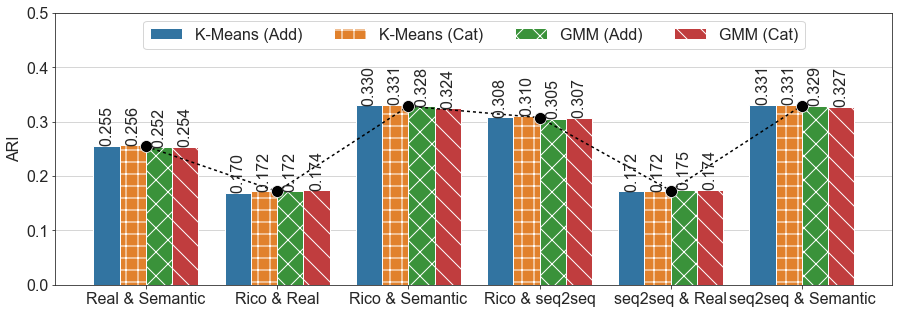

In [148]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_ari_23_mean, hue='type')
sns.lineplot(data=df_ari_23_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper center", bbox_to_anchor=(.5, 1), ncol=4)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.5))
plt.xlabel(None)
plt.ylabel('ARI')
#plt.savefig('../result/plot_ari_23_mean.png', format='png', bbox_inches='tight', transparent=True)

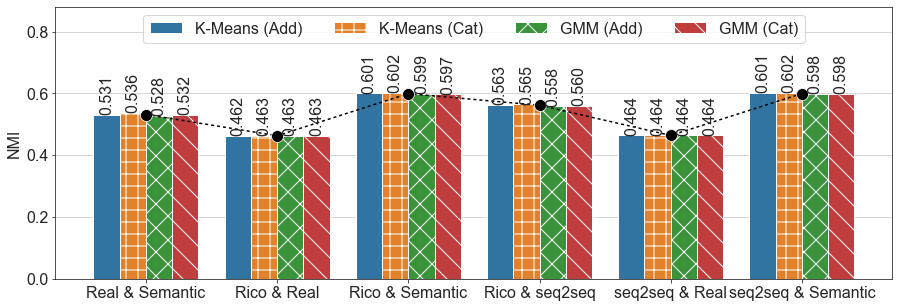

In [149]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_nmi_23_mean, hue='type')
sns.lineplot(data=df_nmi_23_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.88))
plt.xlabel(None)
plt.ylabel('NMI')
#plt.savefig('../result/plot_nmi_23_mean.png', format='png', bbox_inches='tight', transparent=True)

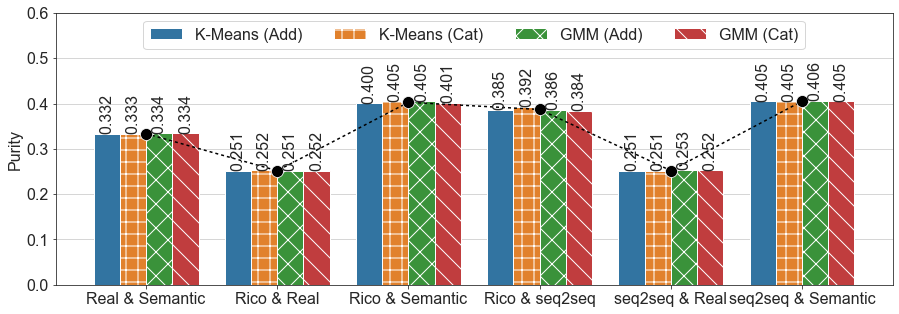

In [150]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_purity_23_mean, hue='type')
sns.lineplot(data=df_purity_23_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.6))
plt.xlabel(None)
plt.ylabel('Purity')
#plt.savefig('../result/plot_purity_23_mean.png', format='png', bbox_inches='tight', transparent=True)

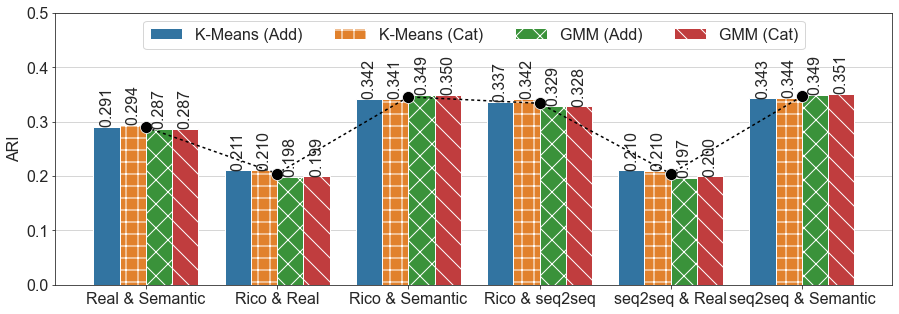

In [151]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_ari_34_mean, hue='type')
sns.lineplot(data=df_ari_34_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.5))
plt.xlabel(None)
plt.ylabel('ARI')
#plt.savefig('../result/plot_ari_34_mean.png', format='png', bbox_inches='tight', transparent=True)

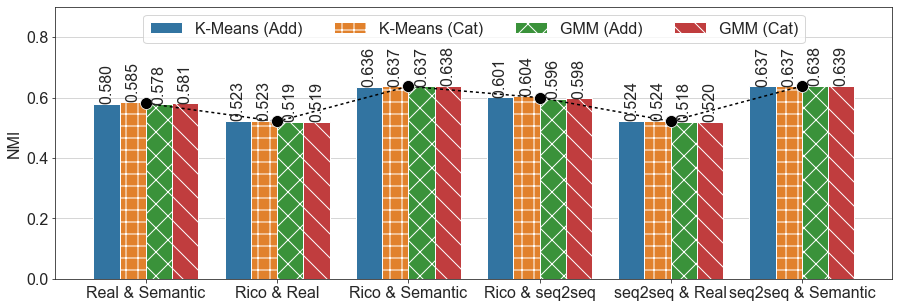

In [152]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_nmi_34_mean, hue='type')
sns.lineplot(data=df_nmi_34_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.9))
plt.xlabel(None)
plt.ylabel('NMI')
#plt.savefig('../result/plot_nmi_34_mean.png', format='png', bbox_inches='tight', transparent=True)

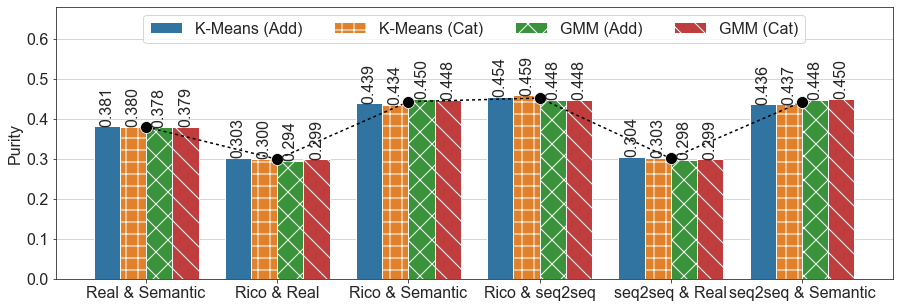

In [153]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_purity_34_mean, hue='type')
sns.lineplot(data=df_purity_34_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.68))
plt.xlabel(None)
plt.ylabel('Purity')
#plt.savefig('../result/plot_purity_34_mean.png', format='png', bbox_inches='tight', transparent=True)